# Decision Trees and Random Forests (House Prices)

# Assignment - Decision Trees and Random Forests

![](https://i.imgur.com/3sw1fY9.jpg)


In this notebook, I'll build models using decision trees and random forest to predict the price of a house using information like its location, area, no. of rooms etc. The dataset is taken from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

I'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model


## Download and prepare the dataset for training 

In [1]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [2]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [3]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#### Identify input and target columns

In [4]:
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

#### Identify numeric and categorical columns

In [5]:
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

#### Impute and scale numeric columns

In [6]:
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

#### One-hot encode categorical columns

In [7]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])


C:\Users\ASAD-AYUB\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_4460\2651333958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_4460\2651333958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_4460\2651333958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_4460\2651333958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])
C:\Users\ASAD-AYUB\AppData\Local\Temp\ipykernel_4460\2651333958.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of cal

#### Create training and validation sets

In [8]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

## Decision Tree

Training of a decision tree regressor using the training set. 

In [9]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
tree = DecisionTreeRegressor(random_state=42)

In [11]:
tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [13]:
train_preds= tree.predict(train_inputs)

In [14]:
type(train_preds)

numpy.ndarray

Predictions on the training and validation sets using the trained decision tree, and computing the RMSE loss.

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
tree_train_preds = tree.predict(train_inputs)

In [17]:
tree_train_preds

array([191000., 181000., 105000., ..., 115000., 189950., 174000.])

In [18]:
tree_train_rmse = (np.sqrt(mean_squared_error(train_targets, tree_train_preds)))
tree_train_rmse

0.0

In [19]:
tree_val_preds = tree.predict(val_inputs)

In [20]:
tree_val_rmse = (np.sqrt(mean_squared_error(val_targets, tree_val_preds)))
tree_val_rmse

39797.73339484453

In [21]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 39797.73339484453


Visualizing the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

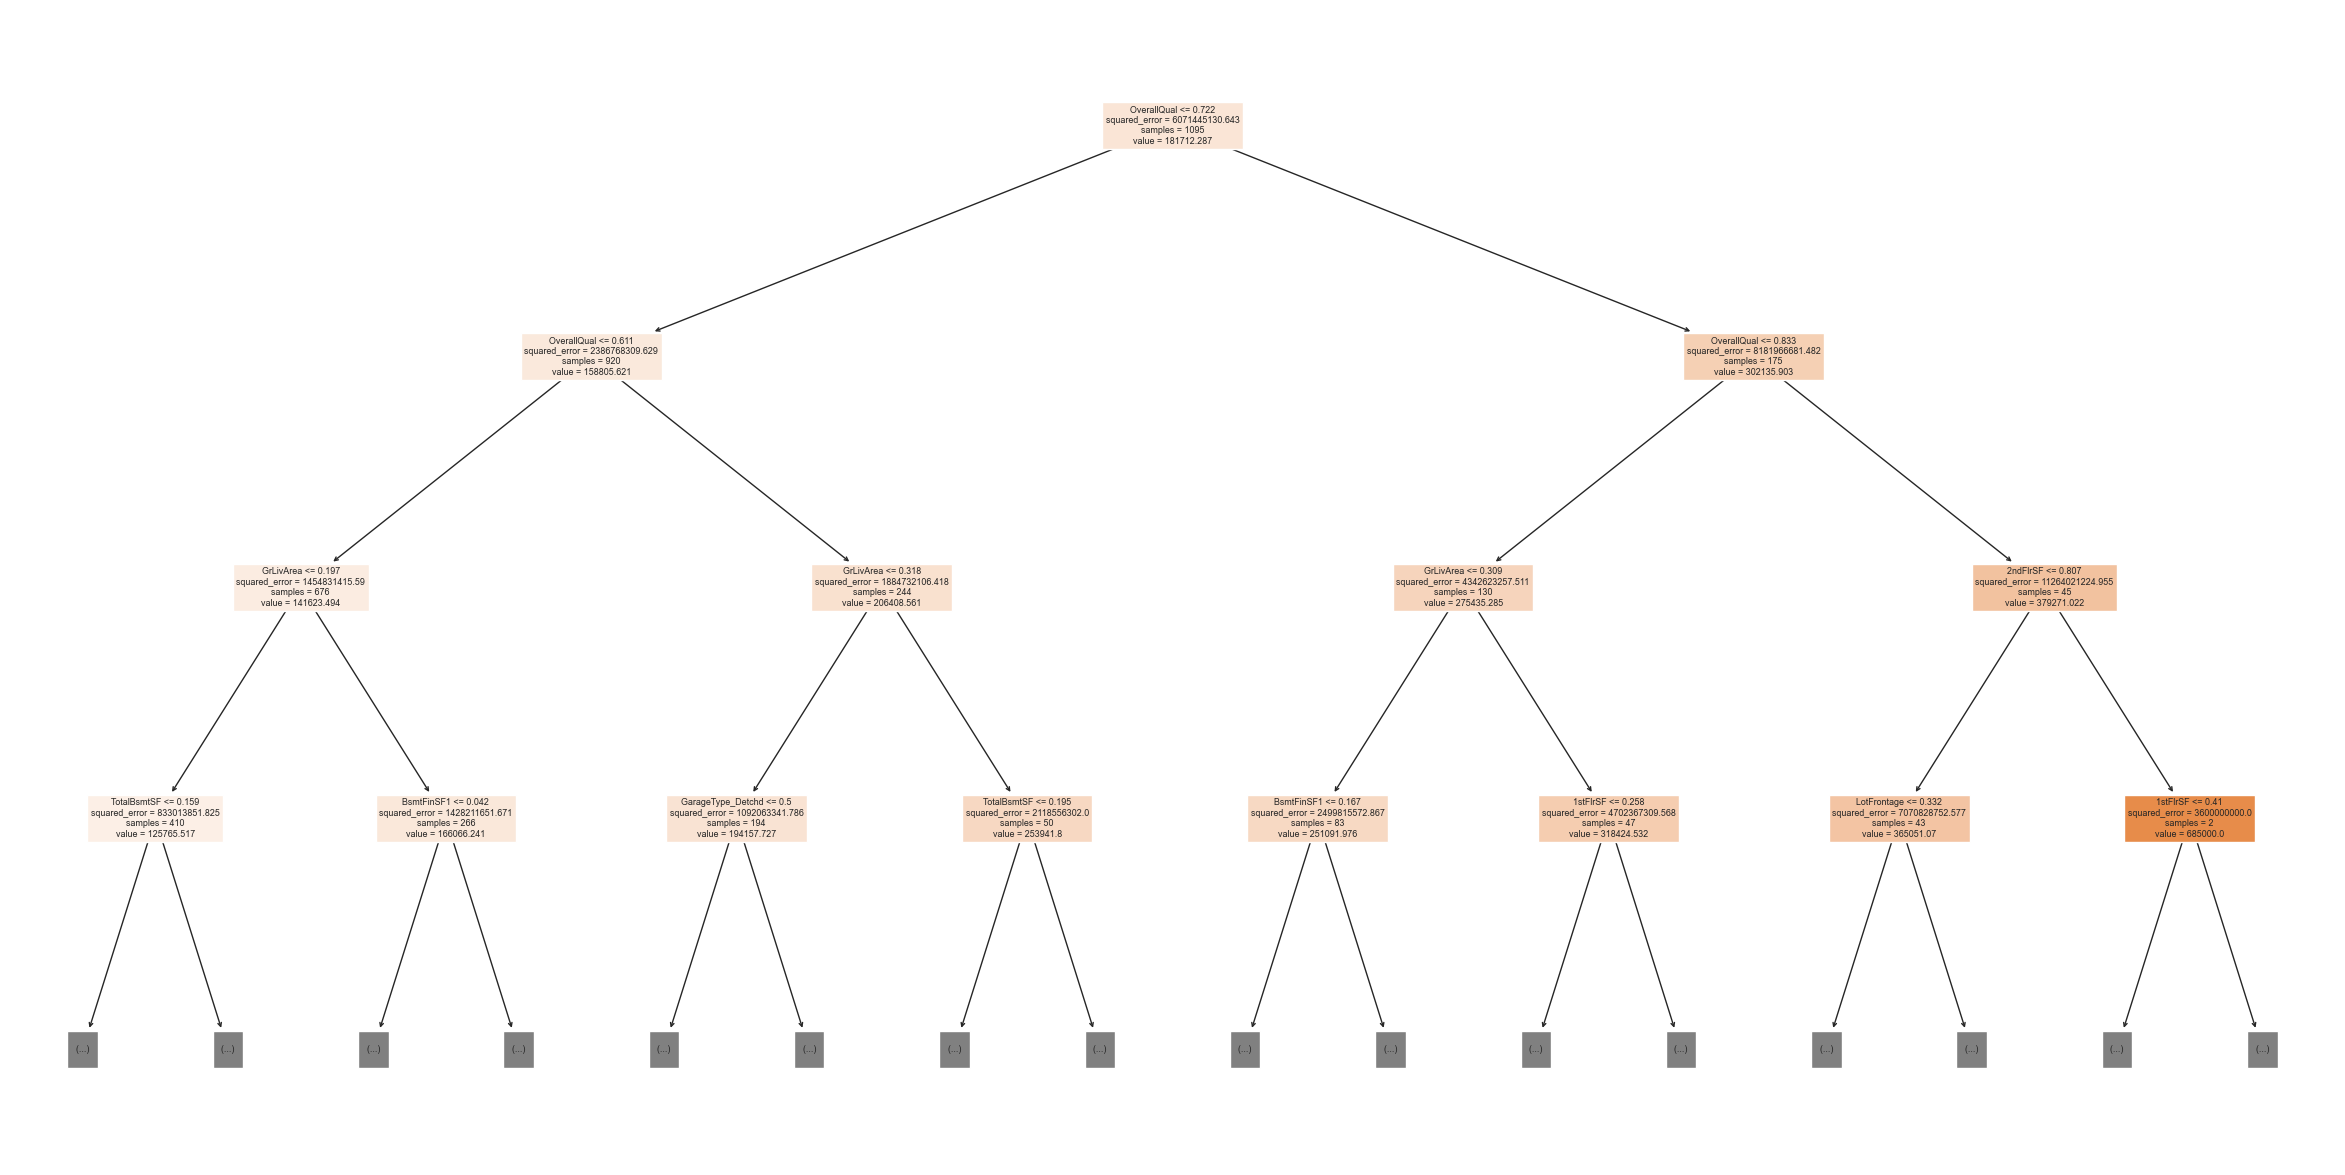

In [23]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
plot_tree(tree, feature_names= train_inputs.columns.tolist(), max_depth = 3, filled = True);

In [24]:
# Visualize the tree textually using export_text
tree_text = export_text(tree,max_depth = 12, feature_names= list(train_inputs.columns))

In [25]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_N <= 0.50
|   |   |   |   |   |   |   |   |--- Functional_Maj2 <= 0.50
|   |   |   |   |   |   |   |   |   |--- FireplaceQu_nan <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- HouseStyle_2Story <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [100000.00]
|   |   |   |   |   |   |   |   |   |   |--- HouseStyle_2Story >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [97000.00]
|   |   |   |   |   |   |   |   |   |--- FireplaceQu_nan >  0.50
|   |   |   |   |   |   |   |   |   |   |--- LotArea <= 0.03
|   |   |   |   |   |   |   |   |   |   |   |--- OverallQual <= 0.28
|   |   |   |   |   |   |   |   |   |   |   |   |--- EnclosedPorch <= 0.26
|   |   |   |   | 

In [26]:
# Check feature importance
tree_importances = tree.feature_importances_

In [27]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [28]:
tree_importance_df

,feature,importance
3,OverallQual,0.632441
15,GrLivArea,0.104394
13,2ndFlrSF,0.031073
12,1stFlrSF,0.028973
11,TotalBsmtSF,0.028034
...,...,...
144,Exterior1st_Stucco,0.000000
149,Exterior2nd_AsphShn,0.000000
152,Exterior2nd_CBlock,0.000000
155,Exterior2nd_ImStucc,0.000000


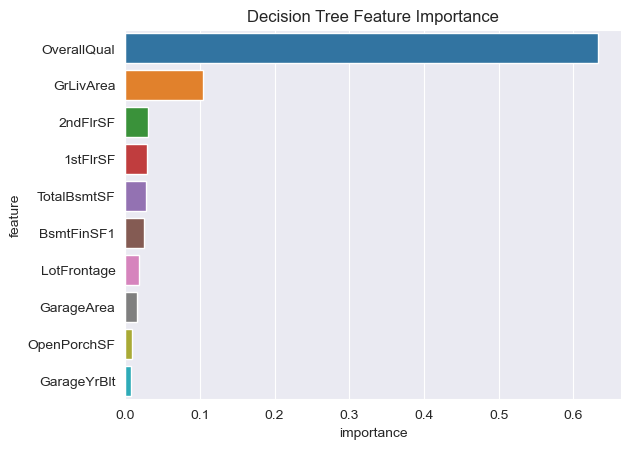

In [29]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

## Random Forests

Train a random forest regressor using the training set.

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
# Create the model
rf1 = RandomForestRegressor(n_jobs= -1, random_state = 42)

In [32]:
# Fit the model
rf1.fit(train_inputs, train_targets)

RandomForestRegressor(n_jobs=-1, random_state=42)

Making predictions using the random forest regressor.

In [33]:
rf1_train_preds = rf1.predict(train_inputs)

In [34]:
rf1_train_rmse = (np.sqrt(mean_squared_error(train_targets, rf1_train_preds)))
rf1_train_rmse


12066.521075000881

In [35]:
rf1_val_preds = rf1.predict(val_inputs)

In [36]:
rf1_val_rmse = (np.sqrt(mean_squared_error(val_targets, rf1_val_preds)))
rf1_val_rmse

27902.228160605046

In [37]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 12066.521075000881, Validation RMSE: 27902.228160605046


## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [38]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [39]:
test_params(n_estimators=20, max_depth=20)

(13473.161389650968, 28556.357550718698)

In [40]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20162.620175261185, 28760.24228057591)

Let's also define a helper function to test and plot different values of a single parameter.

In [41]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

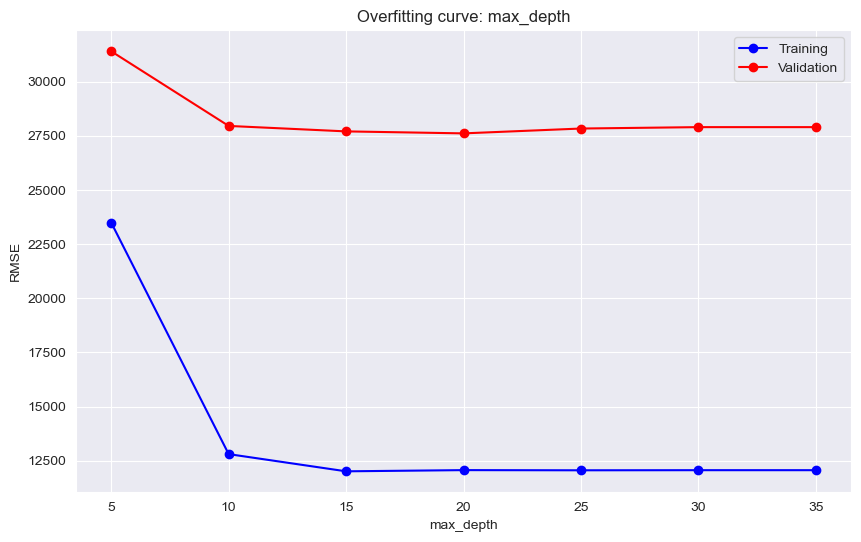

In [42]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

Using the `test_params` and `test_param_and_plot` functions to experiment with different values of the  hyperparmeters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_features`, `max_leaf_nodes`, `min_impurity_decrease`, `min_impurity_split` etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [43]:
test_params(n_estimators=10, max_depth=20, min_samples_leaf=1, min_weight_fraction_leaf=0, max_leaf_nodes=200)

(14010.748676337977, 29902.406199976864)

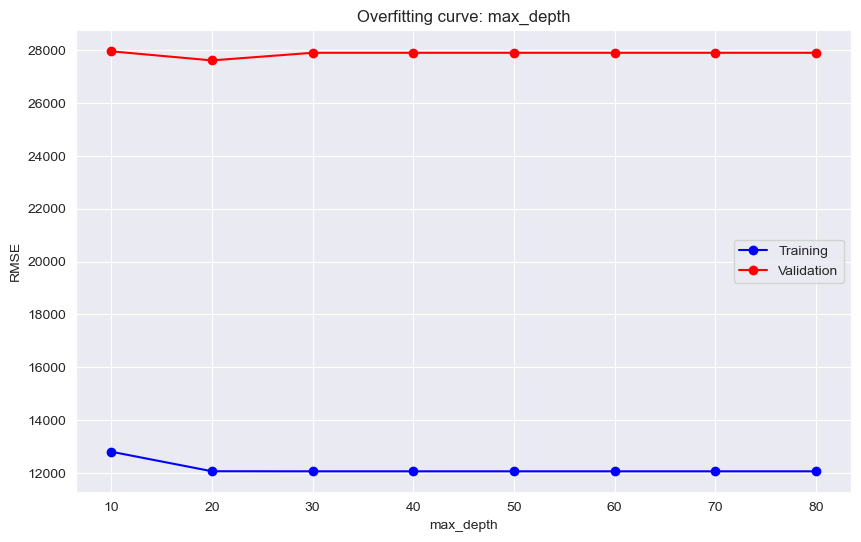

In [44]:
test_param_and_plot('max_depth', [10,20,30,40,50,60,70,80])

## Training the Best Model



Training a random forest regressor model with best hyperparameters to minimize the validation loss.

In [45]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(n_estimators=10, max_depth=20,min_samples_leaf=1,min_weight_fraction_leaf=0,max_leaf_nodes=200)


In [46]:
# Train the model
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=20, max_leaf_nodes=200,
                      min_weight_fraction_leaf=0, n_estimators=10)

Making predictions and evaluate the final model. 

In [47]:
rf2_train_preds = rf2.predict(train_inputs)

In [48]:
rf2_train_rmse =  (np.sqrt(mean_squared_error(train_targets, rf2_train_preds)))
rf2_train_rmse

14298.170245681798

In [49]:
rf2_val_preds = rf2.predict(val_inputs)

In [50]:
rf2_val_rmse =  (np.sqrt(mean_squared_error(val_targets, rf2_val_preds)))

In [51]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 14298.170245681798, Validation RMSE: 31263.086757198245


Let's also view and plot the feature importances.

In [52]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [53]:
rf2_importance_df

,feature,importance
3,OverallQual,0.555648
15,GrLivArea,0.115945
12,1stFlrSF,0.031984
8,BsmtFinSF1,0.028606
11,TotalBsmtSF,0.025974
...,...,...
175,ExterCond_Po,0.000000
172,ExterCond_Ex,0.000000
94,Condition1_RRAe,0.000000
95,Condition1_RRAn,0.000000


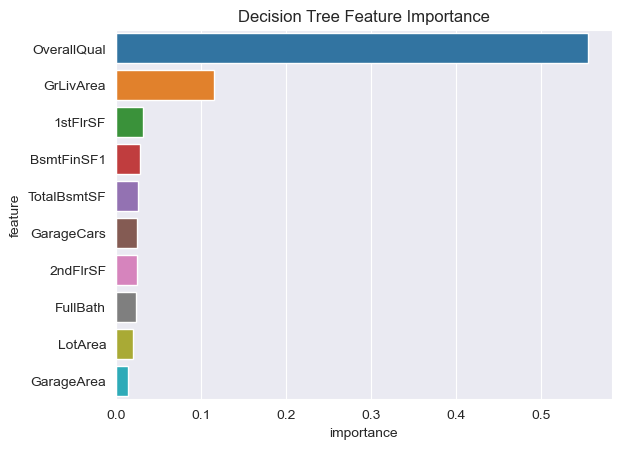

In [54]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature');